In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [4]:
# train_data.info()

In [5]:
# train_data

In [6]:
for i in range(81):
    if train_data[train_data.columns[i]].isnull().sum() > 0:
        count = train_data[train_data.columns[i]].isnull().sum()
        print(f"{train_data.columns[i]}:  {count}")

LotFrontage:  259
Alley:  1369
MasVnrType:  872
MasVnrArea:  8
BsmtQual:  37
BsmtCond:  37
BsmtExposure:  38
BsmtFinType1:  37
BsmtFinType2:  38
Electrical:  1
FireplaceQu:  690
GarageType:  81
GarageYrBlt:  81
GarageFinish:  81
GarageQual:  81
GarageCond:  81
PoolQC:  1453
Fence:  1179
MiscFeature:  1406


In [7]:
for i in range(80):
    if test_data[test_data.columns[i]].isnull().sum() > 0:
        count = test_data[test_data.columns[i]].isnull().sum()
        print(f"{test_data.columns[i]}:  {count}")

MSZoning:  4
LotFrontage:  227
Alley:  1352
Utilities:  2
Exterior1st:  1
Exterior2nd:  1
MasVnrType:  894
MasVnrArea:  15
BsmtQual:  44
BsmtCond:  45
BsmtExposure:  44
BsmtFinType1:  42
BsmtFinSF1:  1
BsmtFinType2:  42
BsmtFinSF2:  1
BsmtUnfSF:  1
TotalBsmtSF:  1
BsmtFullBath:  2
BsmtHalfBath:  2
KitchenQual:  1
Functional:  2
FireplaceQu:  730
GarageType:  76
GarageYrBlt:  78
GarageFinish:  78
GarageCars:  1
GarageArea:  1
GarageQual:  78
GarageCond:  78
PoolQC:  1456
Fence:  1169
MiscFeature:  1408
SaleType:  1


In [8]:
# print(train_data.columns.tolist())

In [9]:
# 无null特征：MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle OverallQual OverallCond YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinSF1 BsmtFinType2 BsmtFinSF2 TotalBsmtSF Heating HeatingQC CentralAir Electrical BsmtFullBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces GarageType GarageYrBlt GarageFinish GarageCars GarageQual GarageCond PavedDrive MoSold YrSold 
# 待定特征：Condition2 BsmtUnfSF 2ndFlrSF LowQualFinSF BsmtHalfBath Fence Foundation BedroomAbvGr 
# 不需要的特征： Alley、PoolQC、Fence、MiscFeature、FireplaceQu、MasVnrType

# MSZoning Utilities Exterior1st Exterior2nd MasVnrArea BsmtQual BsmtExposure BsmtCond BsmtFinSF1 BsmtFinType1 BsmtFinType2 BsmtFinSF2 BsmtUnfSF TotalBsmtSF BsmtFullBath KitchenQual Functional GarageType GarageFinish GarageCars GarageArea GarageQual GarageCond GarageYrBlt用 中位数 填充
# LotFrontage 用 mean 填充 null

# LotFrontage LotArea BsmtUnfSF 1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea Fence MiscFeature MiscVal查看 outlier 占比，了解指标含义，看怎么解决（比如设成“有无”然后和质量指标+-*/）

# MasVnrArea 、Fence、PoolQC看有无
# YearBuilt 与 YearRemodAdd 找出有无改建，然后放进 features
# LotShape和LandContour和LotConfig和LandSlope、ExterQual和ExterCond、Condition1和Condition2 再去了解下特征，可能可以试试转换成数字+-*/
# MoSold 看月份或者季度关系
# SaleType SaleCondition看看有没有法拍房之类的指标
# 地下室、车库相关数据看能不能组合

In [10]:
# # fill null
# fill_null_features = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'GarageYrBlt']
# for i in fill_null_features:
#     if pd.api.types.is_numeric_dtype(train_data[i]) or pd.api.types.is_numeric_dtype(test_data[i]):
#         train_data[i] = train_data[i].fillna(train_data[i].median())
#         test_data[i] = test_data[i].fillna(test_data[i].median())
#     else:
#         train_data[i] = train_data[i].fillna(train_data[i].mode()[0])
#         test_data[i] = test_data[i].fillna(test_data[i].mode()[0])
        
# train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
# test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

In [11]:
# outlier_features = ['MasVnrArea', 'LotFrontage', 'LotArea', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
# for i in outlier_features:
#     if pd.api.types.is_numeric_dtype(train_data[i]) | pd.api.types.is_numeric_dtype(test_data[i]):
#         # train data
#         Q1 = train_data[i].quantile(0.25)
#         Q3 = train_data[i].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         train_outliers = train_data[(train_data[i] < lower_bound) | (train_data[i] > upper_bound)]
#         rate_train_outliers = round(len(train_outliers) * 100 / len(train_data[i]), 2)

#         # test data
#         Q1 = test_data[i].quantile(0.25)
#         Q3 = test_data[i].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         test_outliers = test_data[(test_data[i] < lower_bound) | (test_data[i] > upper_bound)]
#         rate_test_outliers = round(len(test_outliers) * 100 / len(test_data[i]), 2)

#         print(f"{i} rate of train outliers is {rate_train_outliers}%, rate of test outliers is {rate_test_outliers}%")
        
#     else:
#         print(f"{i} is not numeric, check '{i}' meaning")

In [12]:
# train_isremodel = train_data['YearRemodAdd'] - train_data['YearBuilt']
# train_data['IsRemodel'] = train_isremodel.apply(lambda x: 1 if x > 1 else 0)

# test_isremodel = test_data['YearRemodAdd'] - test_data['YearBuilt']
# test_data['IsRemodel'] = test_isremodel.apply(lambda x: 1 if x > 1 else 0)

# train_data['BltYear'] = train_data['YrSold'] - train_data['YearBuilt'] # Ok
# test_data['BltYear'] = test_data['YrSold'] - test_data['YearBuilt'] # Ok

# train_data['HasMasVnr'] = train_data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
# test_data['HasMasVnr'] = test_data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
# # train_data['BsmtQual_num'] = train_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0}) #这个单拎
# train_data['BsmtCond_num'] = train_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0}) 
# train_data['BsmtExposure_num'] = train_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0}) 
# train_data['BsmtFinType1_num'] = train_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}) 
# # train_data['BsmtFinType2_num'] = train_data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}) #这个不行
# train_data['BsmtScore'] = train_data['BsmtCond_num'] + train_data['BsmtExposure_num'] + train_data['BsmtFinType1_num'] 

# # test_data['BsmtQual_num'] = test_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0}) #这个单拎
# test_data['BsmtCond_num'] = test_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0}) 
# test_data['BsmtExposure_num'] = test_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0}) 
# test_data['BsmtFinType1_num'] = test_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}) 
# # test_data['BsmtFinType2_num'] = test_data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}) #这个不行
# test_data['BsmtScore'] = test_data['BsmtCond_num'] + test_data['BsmtExposure_num'] + test_data['BsmtFinType1_num'] 

In [14]:
for i in range(81):
    if train_data[train_data.columns[i]].isnull().sum() > 0:
        count = train_data[train_data.columns[i]].isnull().sum()
        print(f"{train_data.columns[i]}:  {count}")

LotFrontage:  259
Alley:  1369
MasVnrType:  872
MasVnrArea:  8
BsmtQual:  37
BsmtCond:  37
BsmtExposure:  38
BsmtFinType1:  37
BsmtFinType2:  38
Electrical:  1
FireplaceQu:  690
GarageType:  81
GarageYrBlt:  81
GarageFinish:  81
GarageQual:  81
GarageCond:  81
PoolQC:  1453
Fence:  1179
MiscFeature:  1406


In [15]:
for i in range(80):
    if test_data[test_data.columns[i]].isnull().sum() > 0:
        count = test_data[test_data.columns[i]].isnull().sum()
        print(f"{test_data.columns[i]}:  {count}")

MSZoning:  4
LotFrontage:  227
Alley:  1352
Utilities:  2
Exterior1st:  1
Exterior2nd:  1
MasVnrType:  894
MasVnrArea:  15
BsmtQual:  44
BsmtCond:  45
BsmtExposure:  44
BsmtFinType1:  42
BsmtFinSF1:  1
BsmtFinType2:  42
BsmtFinSF2:  1
BsmtUnfSF:  1
TotalBsmtSF:  1
BsmtFullBath:  2
BsmtHalfBath:  2
KitchenQual:  1
Functional:  2
FireplaceQu:  730
GarageType:  76
GarageYrBlt:  78
GarageFinish:  78
GarageCars:  1
GarageArea:  1
GarageQual:  78
GarageCond:  78
PoolQC:  1456
Fence:  1169
MiscFeature:  1408
SaleType:  1


In [16]:
# train_data.loc[:, 'LotArea'] = train_data['LotArea'].apply(lambda x: np.log(float(x)))

In [17]:
num_features = train_data.select_dtypes(include=['number'])
top11_features = num_features.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).to_frame()
top10_features = top11_features.index.drop(['SalePrice']).to_list()
# top10_features
# print(f'{len(top10_features)}\n {top10_features}')

# numertic_df = train_data.select_dtypes(include=['number'])
# matrix = numertic_df.corr()
# filtered_matrix = matrix['SalePrice'].to_frame()

# plt.figure(figsize=(15, 12))
# sns.heatmap(filtered_matrix, cmap='coolwarm', linewidth=0.5)
# plt.show()

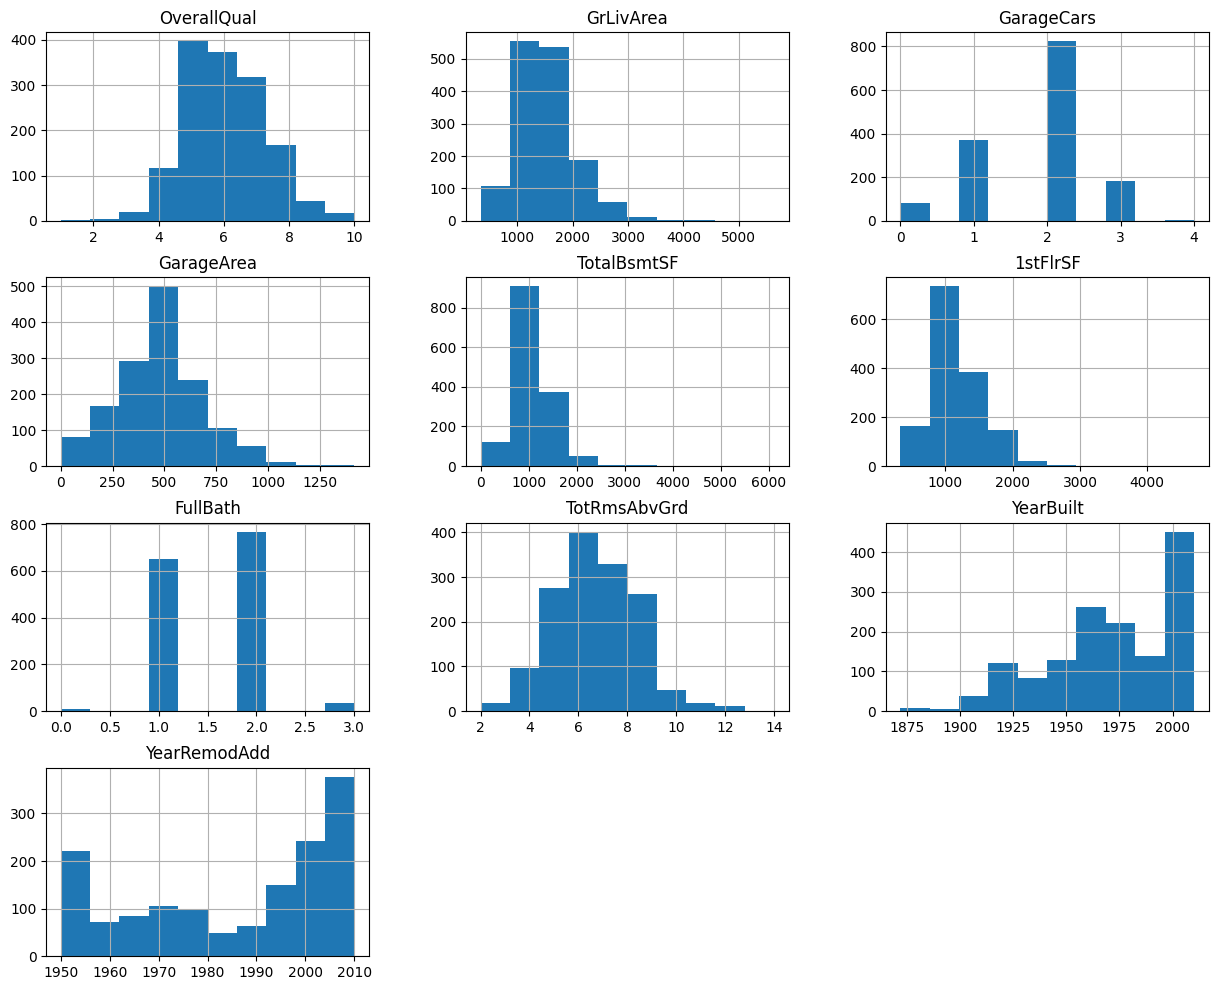

In [18]:
train_data[top10_features].hist(figsize=(15, 12))
plt.show()

In [19]:
# train_data[top10_features].boxplot(figsize=(15, 12))
# plt.show()

In [20]:
# fix, ax = plt.subplots(1, 4, figsize=(25,8))
# sns.boxplot(x=train_data['GrLivArea'], ax=ax[0])
# sns.boxplot(x=train_data['TotalBsmtSF'], ax=ax[1])
# sns.boxplot(x=train_data['1stFlrSF'], ax=ax[2])
# ax[0].grid(True)
# ax[1].grid(True)
# ax[2].grid(True)
# plt.show()

In [21]:
# fix, ax = plt.subplots(1, 3, figsize=(25,8))
# sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], ax=ax[0])
# sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], ax=ax[1])
# sns.scatterplot(x=train_data['1stFlrSF'], y=train_data['SalePrice'], ax=ax[2])
# ax[0].grid(True)
# ax[1].grid(True)
# ax[2].grid(True)
# plt.show()

In [22]:
# fix, ax = plt.subplots(1, 3, figsize=(25,8))
# sns.scatterplot(x=train_data['YearBuilt'], y=train_data['SalePrice'], ax=ax[0])
# sns.scatterplot(x=train_data['GarageArea'], y=train_data['SalePrice'], ax=ax[1])
# sns.scatterplot(x=train_data['LotArea'], y=train_data['SalePrice'], ax=ax[2])
# ax[0].grid(True)
# ax[1].grid(True)
# ax[2].grid(True)
# plt.show()

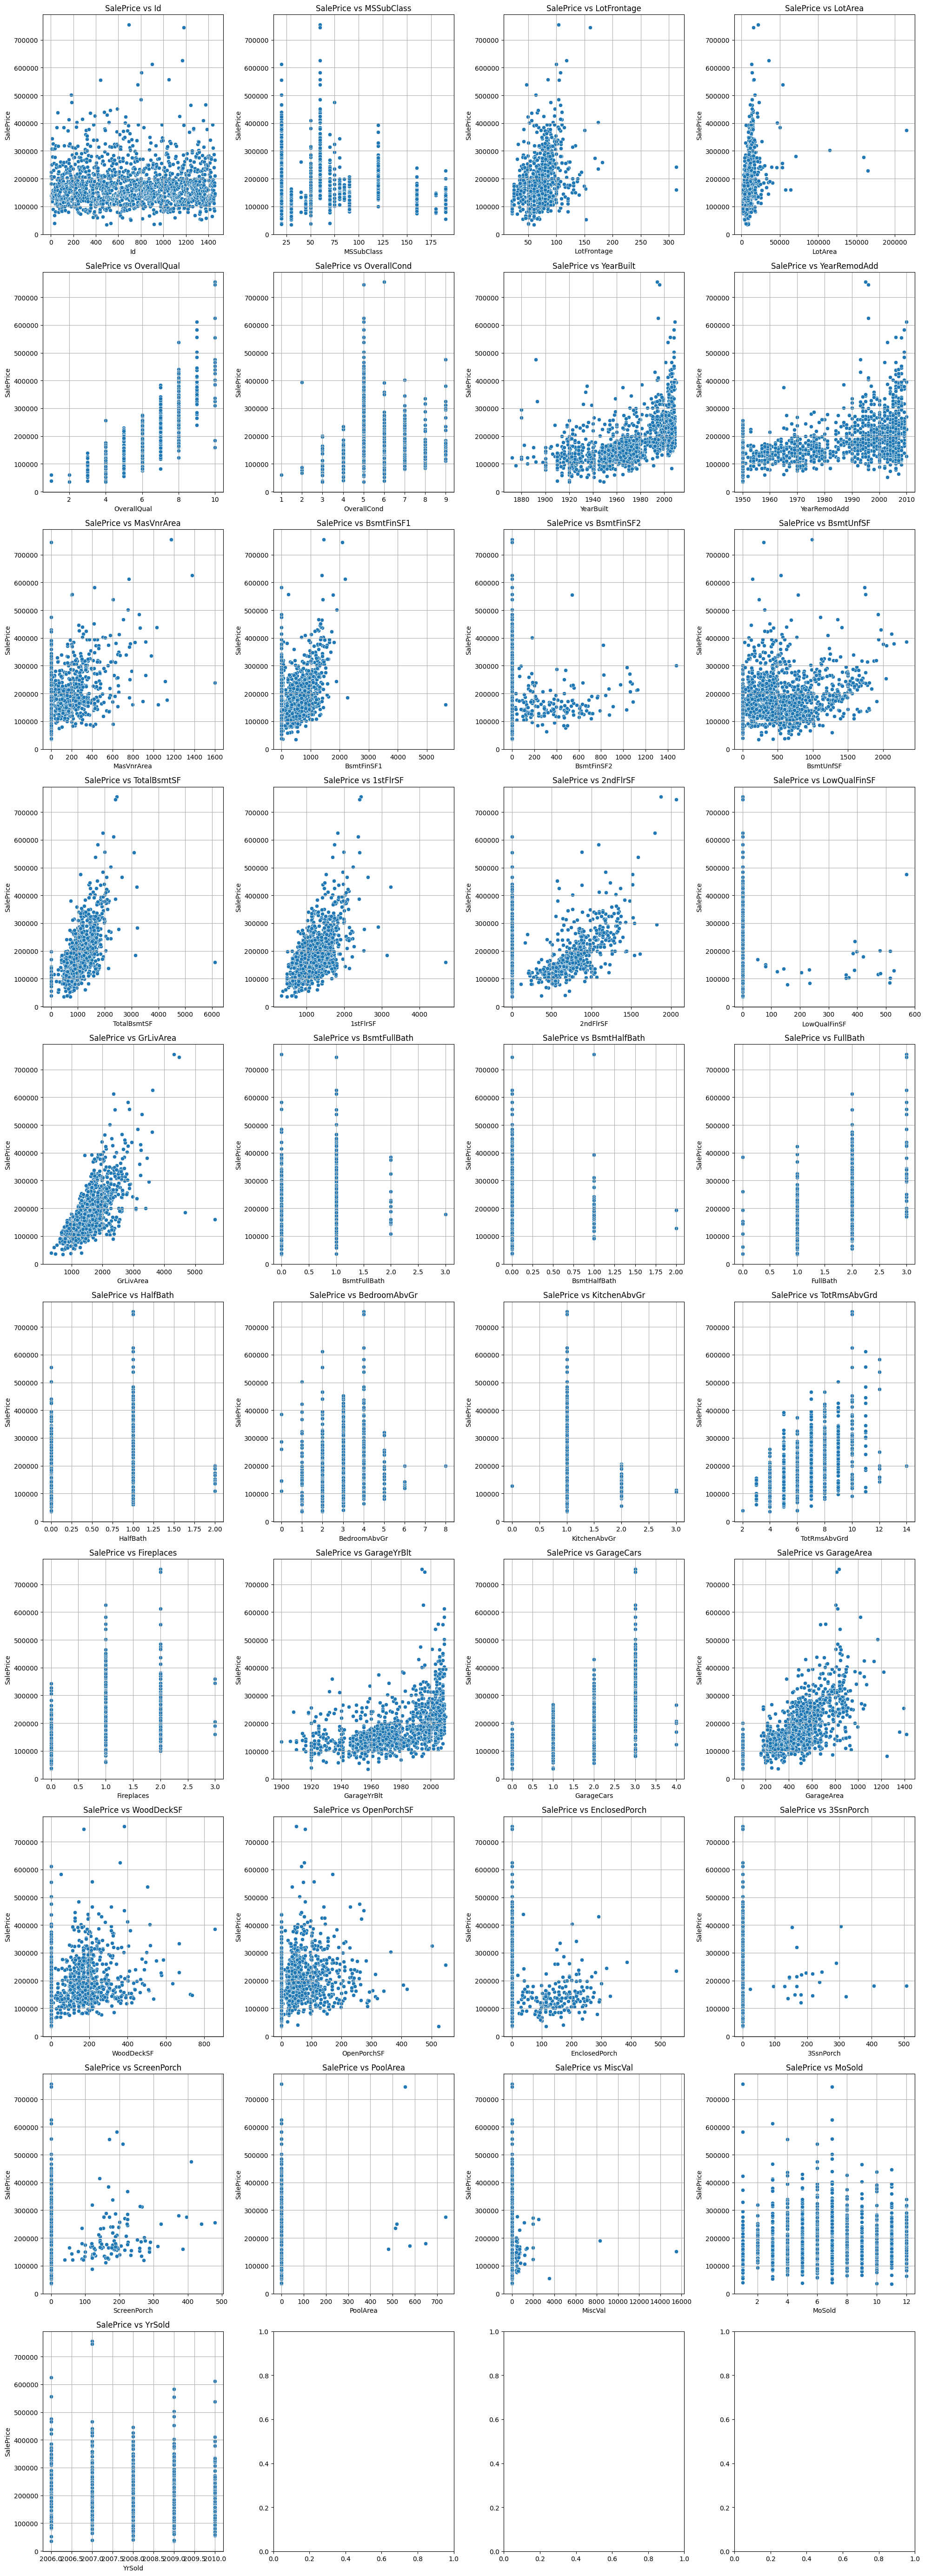

In [23]:
numeric_df = train_data.select_dtypes(include=['number']).columns.to_list()
numeric_df.remove('SalePrice')

fix, ax = plt.subplots(nrows=len(numeric_df) // 4 + 1, ncols=4, figsize=(20, len(numeric_df) * 1.5))
ax = ax.flatten()

for i, feature in enumerate(numeric_df):
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'], ax=ax[i])
    ax[i].set_title(f'SalePrice vs {feature}')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

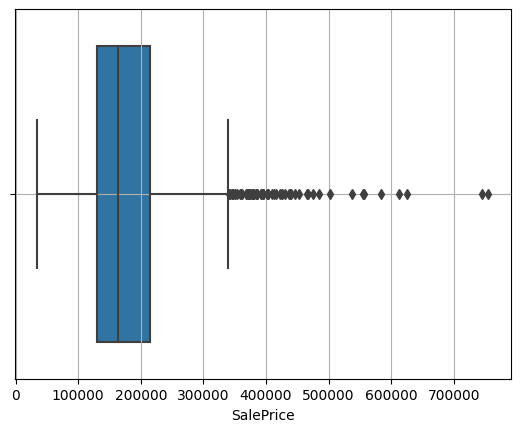

In [24]:
sns.boxplot(x=train_data['SalePrice'])
plt.grid(True)

In [25]:
# train_data.columns.to_list()

In [26]:
print("Before drop shape: ", train_data.shape)
drop1 = train_data[train_data['GrLivArea'] > 4000].index
drop2 = train_data[train_data['TotalBsmtSF'] > 6000].index
drop3 = train_data[train_data['1stFlrSF'] > 4000].index
drop4 = train_data[train_data['SalePrice'] > train_data['SalePrice'].quantile(0.995)].index
drop5 = train_data[train_data['LotArea'] > 100000].index
drop6 = train_data[(train_data['BsmtFinSF1'] > 5000)].index

drop = drop1.union(drop2).union(drop3).union(drop4).union(drop5).union(drop6)
train_data = train_data.drop(drop)
print("After drop shape: ", train_data.shape)

Before drop shape:  (1460, 81)
After drop shape:  (1446, 81)


In [27]:
# numeric_corr = train_data.select_dtypes(include=['number'])
# numeric_corr.corr()['SalePrice'].sort_values(ascending=False)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics

In [29]:
X = train_data.drop(['Id','SalePrice', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass'],axis=1)
y = train_data.SalePrice

cat_cols = X.select_dtypes(include=['object']).columns.to_list()
num_cols = X.select_dtypes(include=['number']).columns.to_list()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_pipe = Pipeline(steps=[('imputer', cat_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_imputer, num_cols), ('cat', cat_pipe, cat_cols)])


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rfre = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# param_grid = {
#     'model__n_estimators': [200, 400, 600],
#     'model__max_depth': [10, 15, 20],
#     'model__min_samples_split': [2, 5, 10]
# }

param_grid = {
    'model__n_estimators': [700, 800, 900],
    'model__learning_rate': [0.04, 0.05, 0.06],
    'model__subsample': [0.2, 0.3, 0.4]
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', gbr)])
grid_search =  GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_val)

mse = metrics.mean_squared_error(y_val, pred)

rmse = np.sqrt(mse)

print("RMSE: ", rmse)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RMSE:  18566.119362866488


In [31]:
grid_search.best_params_

{'model__learning_rate': 0.05,
 'model__n_estimators': 800,
 'model__subsample': 0.3}

In [32]:
X_test = test_data.drop(['Id'], axis=1)
y_pred_test = grid_search.predict(X_test)
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_test})
output.to_csv('submission.csv', index=False)
print('Submission Saved!')

Submission Saved!
